In [14]:
# must occur first:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [15]:
import os
import pandas as pd

# read the dataframe from the csv in the drive
df = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data.csv")

df.head()

,Date,Crypto Volatility,Crypto Growth,Bonds Volatility,Bonds Growth,Major Currencies Volatility,Major Currencies Growth,Other Currencies Volatility,Other Currencies Growth,Indices Volatility,Indices Growth,Money Market Growth,Stooqs Stocks Volatility,Stooqs Stocks Growth
0,2010-07-19,0.01584,-0.00504,0.043850,-0.001233,2.232157,-1.335385,0.168446,-0.043343,88.733051,23.229492,-0.1648,1.04,1.04
1,2010-07-20,0.00755,-0.00606,0.036574,-0.016573,2.213713,1.139422,0.166088,0.033777,121.568833,20.939833,-0.0288,1.92,-1.92
2,2010-07-21,0.01287,0.00447,0.037135,-0.025235,1.920781,0.361047,0.168475,0.063285,87.734000,11.914667,-0.0200,8.19,8.19
3,2010-07-22,0.03131,-0.02871,0.042159,-0.018359,1.666740,0.054496,0.130519,0.009895,132.509831,97.244746,0.0408,7.23,7.23
4,2010-07-23,0.01717,0.01212,0.041130,-0.013021,2.040011,-0.325834,0.163199,0.074019,79.866271,24.910169,0.0508,6.32,6.32


In [16]:
# verify the data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3710 entries, 0 to 3709
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         3710 non-null   object 
 1   Crypto Volatility            3710 non-null   float64
 2   Crypto Growth                3710 non-null   float64
 3   Bonds Volatility             3710 non-null   float64
 4   Bonds Growth                 3710 non-null   float64
 5   Major Currencies Volatility  3710 non-null   float64
 6   Major Currencies Growth      3710 non-null   float64
 7   Other Currencies Volatility  3710 non-null   float64
 8   Other Currencies Growth      3710 non-null   float64
 9   Indices Volatility           3710 non-null   float64
 10  Indices Growth               3710 non-null   float64
 11  Money Market Growth          3710 non-null   float64
 12  Stooqs Stocks Volatility     3710 non-null   float64
 13  Stooqs Stocks Grow

In [17]:
# main problem: finding a good threshold for each volatility column
# we want to know whether that category was volatile or not on that day (i.e. turn the volatility columns into a boolean value)

# lets start with basics: stats on the distributions
df.describe()

,Crypto Volatility,Crypto Growth,Bonds Volatility,Bonds Growth,Major Currencies Volatility,Major Currencies Growth,Other Currencies Volatility,Other Currencies Growth,Indices Volatility,Indices Growth,Money Market Growth,Stooqs Stocks Volatility,Stooqs Stocks Growth
count,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000,3710.000000
mean,23.838933,0.320750,0.052389,-0.003525,34.960262,0.883894,944.964041,11.449922,230.078689,10.315175,0.000175,5.412272,-0.175546
std,65.635303,24.582999,0.027235,0.019145,30.776963,27.528552,1600.549652,778.342204,323.815163,236.686738,0.030338,4.302020,4.603060
min,0.000000,-414.389136,0.003948,-0.239465,0.031242,-256.265121,0.012642,-6522.537098,29.638750,-3348.578394,-0.239200,0.000000,-51.173846
25%,1.809153,-2.317500,0.034794,-0.011111,16.528883,-8.819363,52.411736,-33.002946,89.753893,-31.409107,-0.006800,2.640000,-1.861362
50%,8.919608,0.020000,0.043129,-0.003231,27.775264,0.341516,183.366362,0.012215,122.938724,4.826155,-0.000091,4.925769,0.210000
75%,26.204261,3.025154,0.062297,0.004887,44.871498,10.880909,1116.782827,33.567471,202.193531,40.988326,0.006400,6.985000,2.162115
max,3077.300310,272.890392,0.419557,0.128797,357.277242,142.568304,14776.640376,8482.851833,3548.826786,2924.638987,0.748545,54.945385,24.032308


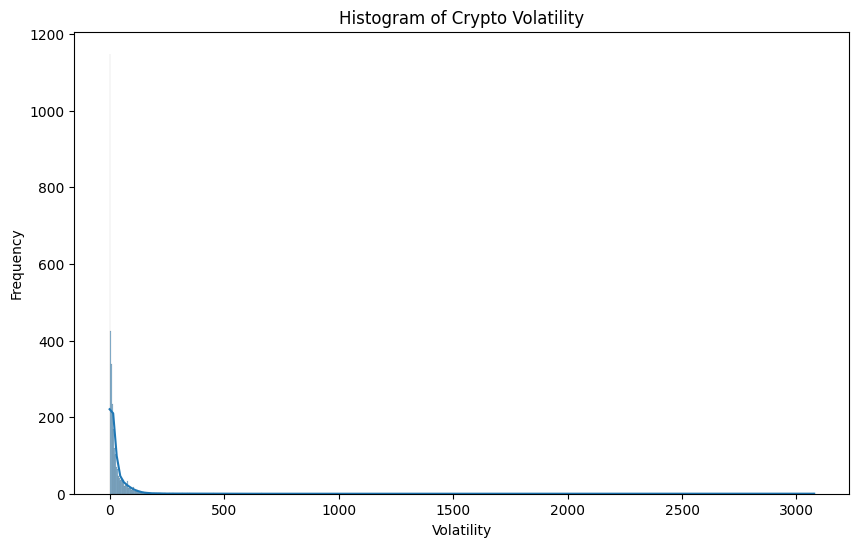

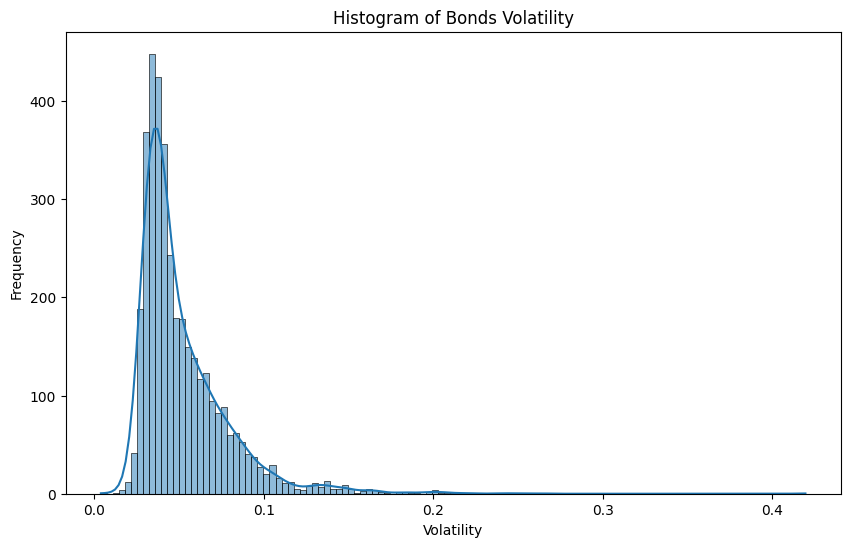

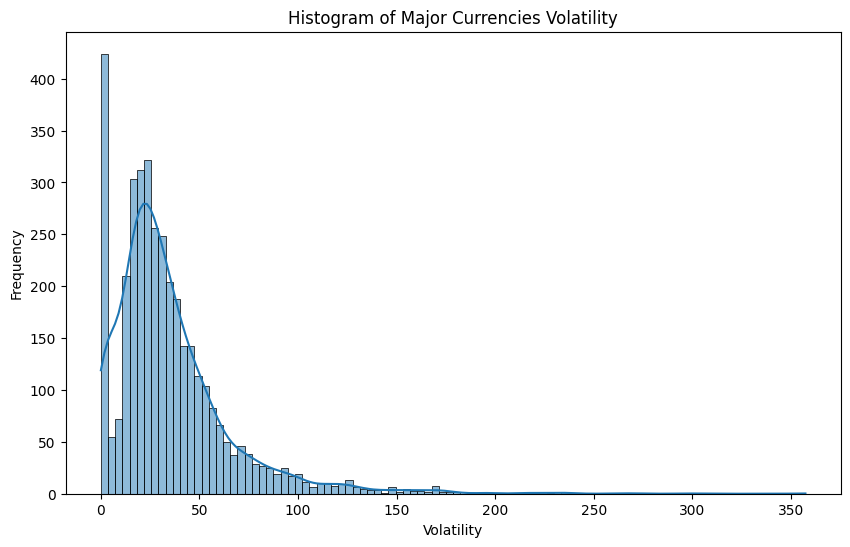

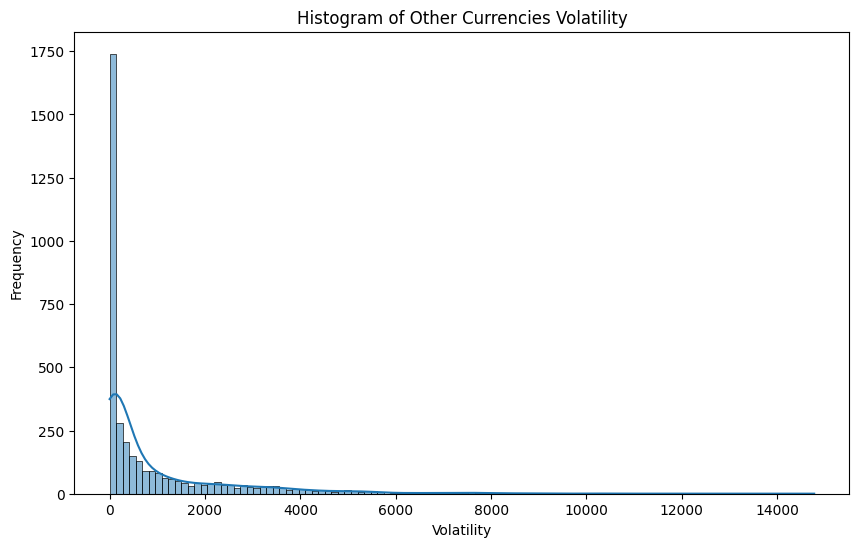

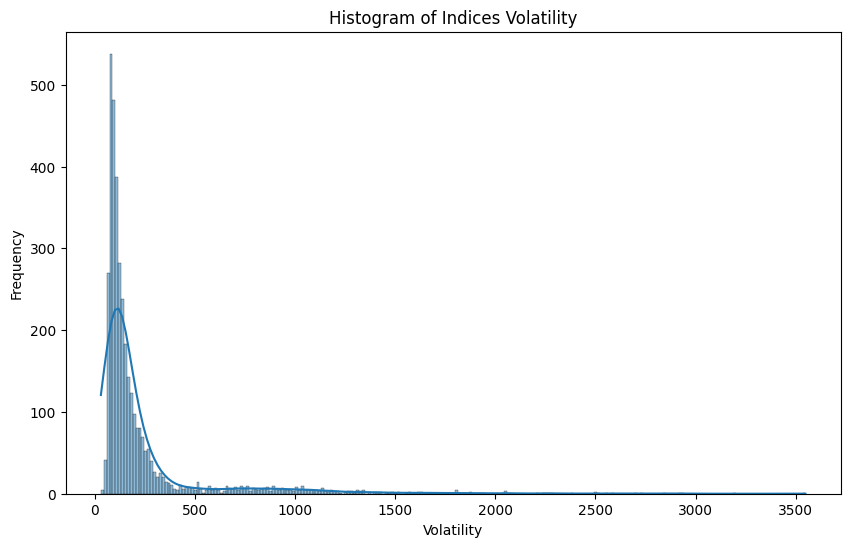

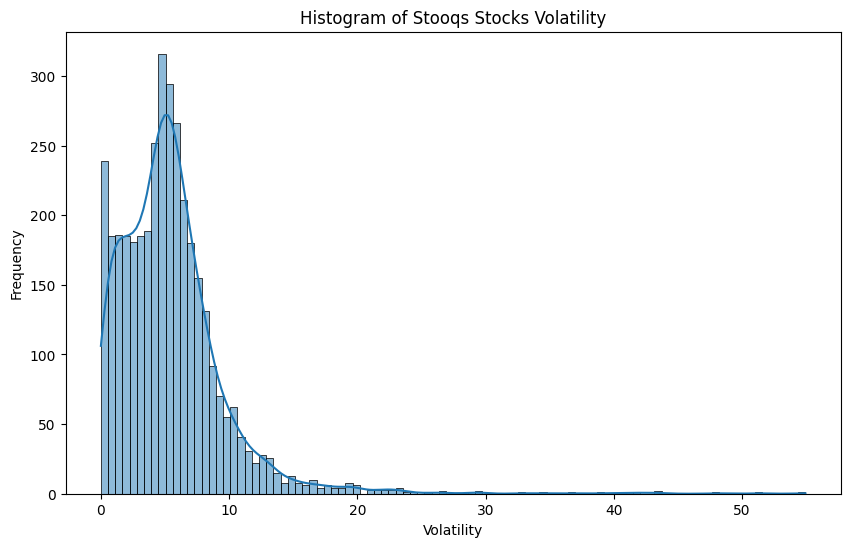

In [18]:
# continue: visualize the distribution for each of the volatility columns

import matplotlib.pyplot as plt
import seaborn as sns

# from Gemini to visualize each distribution
def plot_volatility_histogram(df, col_name):
    """
    Plots a histogram of the volatility data.

    Args:
        df: Pandas DataFrame with volatility data.
        col_name: Name of the volatility column.
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col_name], kde=True)  # kde adds a kernel density estimate
    plt.title(f'Histogram of {col_name}')
    plt.xlabel('Volatility')
    plt.ylabel('Frequency')
    plt.show()

plot_volatility_histogram(df, 'Crypto Volatility')
plot_volatility_histogram(df, 'Bonds Volatility')
plot_volatility_histogram(df, 'Major Currencies Volatility')
plot_volatility_histogram(df, 'Other Currencies Volatility')
plot_volatility_histogram(df, 'Indices Volatility')
plot_volatility_histogram(df, 'Stooqs Stocks Volatility')

# these histograms confirm my expectations: the data is heavily skewed to the right
# there are many 'normal', low-volatility days and a few very high-volatility days

In [19]:
from sklearn.cluster import KMeans
import numpy as np

# from Gemini, asked to find thresholds using K-means clustering on each column
def volatility_threshold_kmeans(df, col_name):
    """
    Classifies volatility using K-means clustering.

    Args:
        df: Pandas DataFrame with volatility data.
        col_name: Name of the volatility column.

    Returns:
        Pandas Series with boolean classification.
    """
    kmeans = KMeans(n_clusters=2, random_state=0)
    clusters = kmeans.fit_predict(df[col_name].values.reshape(-1, 1))
    threshold = np.mean(kmeans.cluster_centers_) # the average of the two cluster centers.
    return threshold

# helper to print the results
def print_threshold_info(df, column):
  min_value = df[column].min()
  max_value = df[column].max()
  threshold = volatility_threshold_kmeans(df, column)
  print(f'{column} : {min_value} : {threshold} : {max_value}')


print("Category : Min : Threshold : Max")
print_threshold_info(df, 'Crypto Volatility')
print_threshold_info(df, 'Bonds Volatility')
print_threshold_info(df, 'Major Currencies Volatility')
print_threshold_info(df, 'Other Currencies Volatility')
print_threshold_info(df, 'Indices Volatility')
print_threshold_info(df, 'Stooqs Stocks Volatility')

Category : Min : Threshold : Max
Crypto Volatility : 0.0 : 1550.1579928159153 : 3077.3003096871203
Bonds Volatility : 0.0039477611940298 : 0.06909289028333777 : 0.4195566666666667
Major Currencies Volatility : 0.0312423495999994 : 59.75603654180725 : 357.27724195636364
Other Currencies Volatility : 0.0126419614678899 : 2290.538580567577 : 14776.640376117226
Indices Volatility : 29.63874999999988 : 647.3349999083366 : 3548.826785714286
Stooqs Stocks Volatility : 0.0 : 8.076024176675702 : 54.94538461538458


In [20]:
# we can see from the above that the thresholds are generally pretty low, matching with the distributions shown before with heavy rightward skews

# some prep to vectorize these operations
thresholds = {}
categories_list = ['Crypto', 'Bonds', 'Major Currencies', 'Other Currencies', 'Indices', 'Stooqs Stocks']

VOLATILITY_STR = "Volatility"
BOOLEAN_STR = "Volatile"

volatility_columns = []
volatile_columns = []

for category in categories_list:
  volatility_columns.append(category + " " + VOLATILITY_STR)
  volatile_columns.append(category + " " + BOOLEAN_STR)

# get the thresholds for each column
for column in volatility_columns:
  thresholds[column] = volatility_threshold_kmeans(df, column)

print(thresholds)

{'Crypto Volatility': np.float64(1550.1579928159153), 'Bonds Volatility': np.float64(0.06909289028333777), 'Major Currencies Volatility': np.float64(59.75603654180725), 'Other Currencies Volatility': np.float64(2290.538580567577), 'Indices Volatility': np.float64(647.3349999083366), 'Stooqs Stocks Volatility': np.float64(8.076024176675702)}


In [21]:
# now add new columns stating the volatility for each category for each day

for column in categories_list:
  volatility = column + " " + VOLATILITY_STR
  volatile = column + " " + BOOLEAN_STR
  df[volatile] = df[volatility] > thresholds[volatility]

df.head()

,Date,Crypto Volatility,Crypto Growth,Bonds Volatility,Bonds Growth,Major Currencies Volatility,Major Currencies Growth,Other Currencies Volatility,Other Currencies Growth,Indices Volatility,Indices Growth,Money Market Growth,Stooqs Stocks Volatility,Stooqs Stocks Growth,Crypto Volatile,Bonds Volatile,Major Currencies Volatile,Other Currencies Volatile,Indices Volatile,Stooqs Stocks Volatile
0,2010-07-19,0.01584,-0.00504,0.043850,-0.001233,2.232157,-1.335385,0.168446,-0.043343,88.733051,23.229492,-0.1648,1.04,1.04,False,False,False,False,False,False
1,2010-07-20,0.00755,-0.00606,0.036574,-0.016573,2.213713,1.139422,0.166088,0.033777,121.568833,20.939833,-0.0288,1.92,-1.92,False,False,False,False,False,False
2,2010-07-21,0.01287,0.00447,0.037135,-0.025235,1.920781,0.361047,0.168475,0.063285,87.734000,11.914667,-0.0200,8.19,8.19,False,False,False,False,False,True
3,2010-07-22,0.03131,-0.02871,0.042159,-0.018359,1.666740,0.054496,0.130519,0.009895,132.509831,97.244746,0.0408,7.23,7.23,False,False,False,False,False,False
4,2010-07-23,0.01717,0.01212,0.041130,-0.013021,2.040011,-0.325834,0.163199,0.074019,79.866271,24.910169,0.0508,6.32,6.32,False,False,False,False,False,False


In [23]:
# save this data to the final csv file

df.to_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data_cleaned.csv")

In [24]:
# ensure we can read this file

df_check = pd.read_csv("/content/drive/MyDrive/CSC442 Team Project/Output/world_combined/final_data_cleaned.csv")
df_check.head()

,Unnamed: 0,Date,Crypto Volatility,Crypto Growth,Bonds Volatility,Bonds Growth,Major Currencies Volatility,Major Currencies Growth,Other Currencies Volatility,Other Currencies Growth,...,Indices Growth,Money Market Growth,Stooqs Stocks Volatility,Stooqs Stocks Growth,Crypto Volatile,Bonds Volatile,Major Currencies Volatile,Other Currencies Volatile,Indices Volatile,Stooqs Stocks Volatile
0,0,2010-07-19,0.01584,-0.00504,0.043850,-0.001233,2.232157,-1.335385,0.168446,-0.043343,...,23.229492,-0.1648,1.04,1.04,False,False,False,False,False,False
1,1,2010-07-20,0.00755,-0.00606,0.036574,-0.016573,2.213713,1.139422,0.166088,0.033777,...,20.939833,-0.0288,1.92,-1.92,False,False,False,False,False,False
2,2,2010-07-21,0.01287,0.00447,0.037135,-0.025235,1.920781,0.361047,0.168475,0.063285,...,11.914667,-0.0200,8.19,8.19,False,False,False,False,False,True
3,3,2010-07-22,0.03131,-0.02871,0.042159,-0.018359,1.666740,0.054496,0.130519,0.009895,...,97.244746,0.0408,7.23,7.23,False,False,False,False,False,False
4,4,2010-07-23,0.01717,0.01212,0.041130,-0.013021,2.040011,-0.325834,0.163199,0.074019,...,24.910169,0.0508,6.32,6.32,False,False,False,False,False,False
